# Image Data Processing

This notebook's purpose is to convert image data to arrays. To mitigate the class imbalance, SMOTE and ADASYN technique is practiced. 

## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from scipy import ndimage

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from imblearn.over_sampling import SMOTE, ADASYN

Using TensorFlow backend.
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Loading Data

Now let's load the data with a pathway.

In [2]:
train_df = pd.read_csv('../data/interim/train.csv')
train_df.head()

,Unnamed: 0,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,path,target
0,12594,ISIC_3879233,IP_3564160,female,65.0,upper extremity,unknown,benign,../data/raw/jpeg/train/ISIC_3879233.jpg,0
1,5755,ISIC_1828419,IP_1522453,female,25.0,torso,unknown,benign,../data/raw/jpeg/train/ISIC_1828419.jpg,0
2,3467,ISIC_1150399,IP_4879325,female,55.0,torso,unknown,benign,../data/raw/jpeg/train/ISIC_1150399.jpg,0
3,11154,ISIC_3435115,IP_3448782,male,50.0,torso,unknown,benign,../data/raw/jpeg/train/ISIC_3435115.jpg,0
4,14746,ISIC_4516835,IP_5474292,male,40.0,lower extremity,unknown,benign,../data/raw/jpeg/train/ISIC_4516835.jpg,0


In [3]:
test_df = pd.read_csv('../data/interim/test.csv')
test_df.head()

,Unnamed: 0,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,path,target
0,11493,ISIC_3541663,IP_1091619,male,40.0,torso,unknown,benign,../data/raw/jpeg/train/ISIC_3541663.jpg,0
1,20808,ISIC_0066116,-1,male,65.0,anterior torso,MEL,malignant,../data/raw/archive/train/ISIC_0066116.jpg,1
2,14594,ISIC_4472903,IP_5945814,female,35.0,lower extremity,unknown,benign,../data/raw/jpeg/train/ISIC_4472903.jpg,0
3,21209,ISIC_6436590,IP_9164079,female,40.0,torso,unknown,benign,../data/raw/jpeg/train/ISIC_6436590.jpg,0
4,26217,ISIC_7959322,IP_0843629,male,35.0,torso,unknown,benign,../data/raw/jpeg/train/ISIC_7959322.jpg,0


In [4]:
val_df = pd.read_csv('../data/interim/val.csv')
val_df.head()

,Unnamed: 0,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,path,target
0,5688,ISIC_1802797,IP_2913292,male,50.0,lower extremity,unknown,benign,../data/raw/jpeg/train/ISIC_1802797.jpg,0
1,19374,ISIC_5883084,IP_2152204,female,50.0,torso,unknown,benign,../data/raw/jpeg/train/ISIC_5883084.jpg,0
2,24189,ISIC_7343496,IP_4584109,female,60.0,lower extremity,seborrheic keratosis,benign,../data/raw/jpeg/train/ISIC_7343496.jpg,0
3,5752,ISIC_0027155,-1,male,65.0,head/neck,MEL,malignant,../data/raw/archive/train/ISIC_0027155.jpg,1
4,27667,ISIC_8374701,IP_6318212,female,55.0,torso,unknown,benign,../data/raw/jpeg/train/ISIC_8374701.jpg,0


To convert the image to array, we are separating target column with rest of the columns.

In [5]:
train_X = train_df.drop('target', axis=1)
train_y = train_df.target

test_X = test_df.drop('target', axis=1)
test_y = test_df.target

val_X = val_df.drop('target', axis=1)
val_y = val_df.target

train_size = int(len(train_df)/5) #To save the time, only 1/5 of the images will be used.
test_size = int(len(test_df)/5)   #If not satisfied with result, sample size will be increased. 
val_size = int(len(val_df)/5)

Converting Image to array!

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True).flow_from_dataframe(train_df,
                                                                             x_col='path',
                                                                             y_col='benign_malignant',
                                                                             target_size=(64, 64),
                                                                             batch_size= train_size)
test_datagen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(test_df,
                                                                             x_col='path',
                                                                             y_col='benign_malignant',
                                                                             target_size=(64, 64),
                                                                             batch_size= test_size)
val_datagen =  ImageDataGenerator(rescale=1./255).flow_from_dataframe(val_df,
                                                                             x_col='path',
                                                                             y_col='benign_malignant',
                                                                             target_size=(64, 64),
                                                                             batch_size= val_size)

Found 27106 validated image filenames belonging to 2 classes.
Found 6777 validated image filenames belonging to 2 classes.
Found 3765 validated image filenames belonging to 2 classes.


Here are the purpose of the parameters for the ImageDataGenerator.

1. Rescaling is performed to normalize the data for easier computation. <br>
2. Zoom range is applied because not all images will be taken from the same distance. It further gives adjustment to the images to have similar distance/zoom level. <br>
3. Rotation range is applied to check images at different angle in 2D. <br>
4. Width and Height shift allows images to be stretched or reduced to fit similar size.<br>
5. Shearing range is applied because not all images will have same depth. It further gives adjustment to the for images to have similar depth level. <br>
6. Horizontal_flip is applied for each images might have been applied mirror view. <br>

Here are the purpose of the parameters for flow_from_directory.
1. target_size is the size of the image in pixels.<br>
2. batch_size is the number of images to be be generated. <br>
3. Color of the image is huge factor for malignagt determination so it is left at default mode (full-color).

In [7]:
train_images, train_labels = next(train_datagen)
test_images, test_labels = next(test_datagen)
val_images, val_labels = next(val_datagen)

In [8]:
#checking classes
print("Train data set classes",train_datagen.class_indices)
print("Test data set classes",test_datagen.class_indices)
print("Validation data set classes",val_datagen.class_indices)

Train data set classes {'benign': 0, 'malignant': 1}
Test data set classes {'benign': 0, 'malignant': 1}
Validation data set classes {'benign': 0, 'malignant': 1}


Checking the shapes of the array to have the right fit for the deep learning models.

In [9]:
# Explore your dataset again
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))

print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 5421
Number of testing samples: 1355
Number of validation samples: 753
train_images shape: (5421, 64, 64, 3)
train_labels shape: (5421, 2)
test_images shape: (1355, 64, 64, 3)
test_labels shape: (1355, 2)
val_images shape: (753, 64, 64, 3)
val_labels shape: (753, 2)


## Sample Images

In [10]:
train_df = pd.DataFrame(train_labels, columns=['Benign', 'Malignant'])
train_df.head()

,Benign,Malignant
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [11]:
benign_df = train_df[train_df.Benign==1.0]
benign_index = benign_df.index
benign_df.head()

,Benign,Malignant
0,1.0,0.0
1,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0


In [12]:
malig_df = train_df[train_df.Malignant==1.0]
malig_index = malig_df.index
malig_df.head()

,Benign,Malignant
2,0.0,1.0
9,0.0,1.0
10,0.0,1.0
11,0.0,1.0
14,0.0,1.0


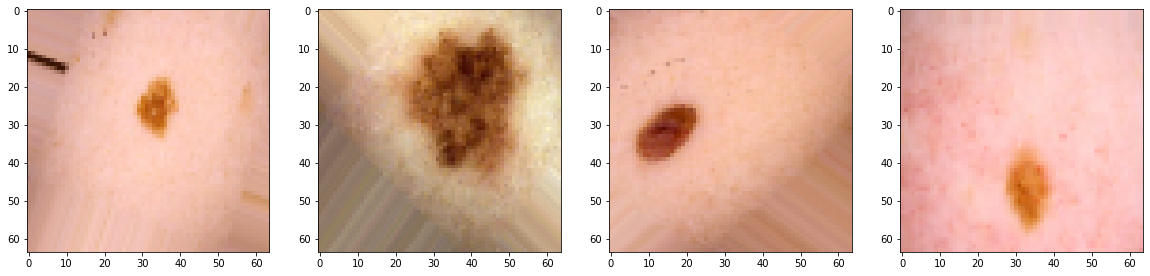

In [13]:
plt.figure(figsize=(20,5))
for i in list(range(4)):
    pic_index = benign_index[i]
    plt.subplot(1,4,i+1)
    plt.imshow(array_to_img(train_images[pic_index]))
plt.savefig("../reports/Benign Picture Samples", dpi=300)

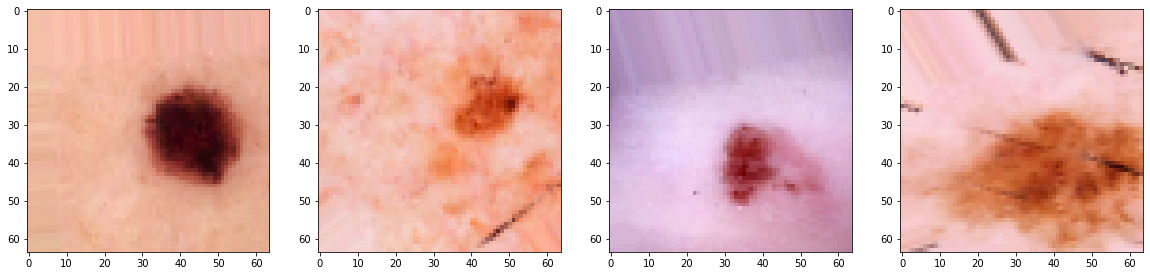

In [14]:
plt.figure(figsize=(20,5))
for i in list(range(4)):
    pic_index = malig_index[i]
    plt.subplot(1,4,i+1)
    plt.imshow(array_to_img(train_images[pic_index]))
plt.savefig("../reports/Malig Picture Samples", dpi=300)

## Reshape and Class Imbalance - Smote & Adasyn

Despite of effort to balance the images between 2 classes by adding more samples to Malignant. Class ratio is still at 1:6. In order to mitigate class imbalance, both SMOTE and Adasyn technique will be applied.

In [15]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(5421, 12288)
(1355, 12288)
(753, 12288)


In [16]:
train_y = np.reshape(train_labels[:,0], (train_img.shape[0],1))
test_y = np.reshape(test_labels[:,0], (test_img.shape[0],1))
val_y = np.reshape(val_labels[:,0], (val_img.shape[0],1))

In [17]:
smote = SMOTE(random_state=42)
smote_train_img, smote_train_y = smote.fit_sample(train_img, train_y)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
unique_elements, counts_elements = np.unique(smote_train_y, return_counts=True)
print(unique_elements)
print(counts_elements)

[0. 1.]
[4633 4633]


In [19]:
adasyn = ADASYN(random_state=42)
adasyn_train_img, adasyn_train_y = adasyn.fit_sample(train_img, train_y)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
unique_elements, counts_elements = np.unique(adasyn_train_y, return_counts=True)
print(unique_elements)
print(counts_elements)

[0. 1.]
[4810 4633]


In [21]:
smote_train_images = smote_train_img.reshape(smote_train_img.shape[0],64,64,3)

In [22]:
adasyn_train_images = adasyn_train_img.reshape(adasyn_train_img.shape[0],64,64,3)

## Exporting Processed Data

In [23]:
np.savetxt("../data/processed/train_img.csv", train_img, delimiter=",")

In [24]:
np.savetxt("../data/processed/train_labels.csv", train_labels, delimiter=",")

np.savetxt("../data/processed/test_img.csv", test_img, delimiter=',')
np.savetxt("../data/processed/test_labels.csv", test_labels, delimiter=",")

np.savetxt("../data/processed/val_img.csv", val_img, delimiter=',')
np.savetxt("../data/processed/val_labels.csv", val_labels, delimiter=",")

np.savetxt("../data/processed/smote_train_img.csv", smote_train_img, delimiter=",")
np.savetxt("../data/processed/smote_train_labels.csv", smote_train_y, delimiter=",")

np.savetxt("../data/processed/adasyn_train_img.csv", adasyn_train_img, delimiter=",")
np.savetxt("../data/processed/adasyn_train_labels.csv", adasyn_train_y, delimiter=",")


## Conclusion

By using keras, jpeg format of data was converted to arrays then saved as a txt form. For the mitigation of the class imbalance, SMOTE and ADASYN technique was applied.